In [1]:
!pip install lxml

Defaulting to user installation because normal site-packages is not writeable


In [94]:
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
import numpy as np

def fetch_html_tables(url):
    page = requests.get(url)
    bs=BeautifulSoup(page.content)
    tables=bs.find_all('table')
    return tables

tables=fetch_html_tables('https://www.motor.no/aktuelt/motors-store-vintertest-av-rekkevidde-pa-elbiler/217132')
table_html=tables[0]

#printing top
print(str(table_html)[:1000])

<table class="" style="">
<thead>
<tr>
<td>
                Modell (temp. varierte fra 0° til -10°)
                </td>
<td>
                WLTP-tall
                </td>
<td>
                STOPP
                </td>
<td>
                Avvik
                </td>
</tr>
</thead>
<tbody>
<tr><td>Tesla Model 3 LR Dual motor</td><td>614 km/14,7 kWh</td><td>521 km</td><td>-15,15 %</td></tr>
<tr><td>Mercedes-Benz EQS 580 4matic</td><td>645 km/18,3 kWh</td><td>513 km</td><td>-20,47 %</td></tr>
<tr><td>BMW iX xDrive50</td><td>591 km/21,4 kWh</td><td>503 km</td><td>-14,89 %</td></tr>
<tr><td>Tesla Model Y LR Dual motor</td><td>507 km/16,9 kWh</td><td>451 km</td><td>-11,05 %</td></tr>
<tr><td>Volkswagen ID.3 PRO S</td><td>539 km/16,3 kWh</td><td>435 km</td><td>-19,29 %</td></tr>
<tr><td>Kia EV6 2WD</td><td>528 km/16,5 kWh</td><td>429 km</td><td>-18,75 %</td></tr>
<tr><td>NIO ES8 LR 7-seter</td><td>488 km/21,5 kWh</td><td>425 km</td><td>-12,91 %</td></tr>
<tr><td>Kia EV6 4WD</td><td>484 

In [95]:
def html_to_table(html):
    #defining the table:
    table=[]
    #iterating over all rows
    for row in html.find_all('tr'):
        r=[]
        #finding all cells in each row:
        cells=row.find_all('td')
        
        #if no cells are found, look for headings
        if len(cells)==0:
            cells=row.find_all('th')
            
        #iterate over cells:
        for cell in cells:
            cell=format(cell)
            r.append(cell)
        
        #append the row to t:
        table.append(r)
    return table
def format(cell):
    if cell.content is None:
        s=cell.text
    elif len(cell.content)==0:
        return ''
    else:
        s=' '.join([str(c) for c in cell.content])
        
    #here you can add additional characters/strings you want to 
    #remove, change punctuations or format the string in other
    #ways:
    s=s.replace('\xa0','')
    s=s.replace('\n','')
    return s

In [96]:
table=html_to_table(table_html)

#printing top
print(str(table)[:1000])
';'.join(table[0])

[['                Modell (temp. varierte fra 0° til -10°)                ', '                WLTP-tall                ', '                STOPP                ', '                Avvik                '], ['Tesla Model 3 LR Dual motor', '614 km/14,7 kWh', '521 km', '-15,15 %'], ['Mercedes-Benz EQS 580 4matic', '645 km/18,3 kWh', '513 km', '-20,47 %'], ['BMW iX xDrive50', '591 km/21,4 kWh', '503 km', '-14,89 %'], ['Tesla Model Y LR Dual motor', '507 km/16,9 kWh', '451 km', '-11,05 %'], ['Volkswagen ID.3 PRO S', '539 km/16,3 kWh', '435 km', '-19,29 %'], ['Kia EV6 2WD', '528 km/16,5 kWh', '429 km', '-18,75 %'], ['NIO ES8 LR 7-seter', '488 km/21,5 kWh', '425 km', '-12,91 %'], ['Kia EV6 4WD', '484 km/18,0 kWh', '423 km', '-12,60 %'], ['Volkswagen ID.4 Pro', '485 km/18,4 kWh', '414 km', '-14,64 %'], ['Hyundai Ioniq 5 2WD', '481 km/16,8 kWh', '408 km', '-15,18 %'], ['BMW i4 M50', '497 km/19,0 kWh', '406 km', '-18,31 %'], ['Skoda Enyaq iV80X', '477 km/18,2 kWh', '403 km', '-15,51 %'], ['Porsch

'                Modell (temp. varierte fra 0° til -10°)                ;                WLTP-tall                ;                STOPP                ;                Avvik                '

In [97]:
def save_data(file_name,table):
    f=open(file_name,'w')
    for row in table:
        f.write(';'.join(row)+'\n')
    f.close()
    
    
save_data('motordata.csv',table)

In [98]:
import pandas as pd
df = pd.read_csv('motordata.csv', delimiter=';', encoding='latin1', on_bad_lines='skip')
df

,Modell (temp. varierte fra 0Â° til -10Â°),WLTP-tall,STOPP,Avvik
0,Tesla Model 3 LR Dual motor,"614 km/14,7 kWh",521 km,"-15,15 %"
1,Mercedes-Benz EQS 580 4matic,"645 km/18,3 kWh",513 km,"-20,47 %"
2,BMW iX xDrive50,"591 km/21,4 kWh",503 km,"-14,89 %"
3,Tesla Model Y LR Dual motor,"507 km/16,9 kWh",451 km,"-11,05 %"
4,Volkswagen ID.3 PRO S,"539 km/16,3 kWh",435 km,"-19,29 %"
5,Kia EV6 2WD,"528 km/16,5 kWh",429 km,"-18,75 %"
6,NIO ES8 LR 7-seter,"488 km/21,5 kWh",425 km,"-12,91 %"
7,Kia EV6 4WD,"484 km/18,0 kWh",423 km,"-12,60 %"
8,Volkswagen ID.4 Pro,"485 km/18,4 kWh",414 km,"-14,64 %"
9,Hyundai Ioniq 5 2WD,"481 km/16,8 kWh",408 km,"-15,18 %"


In [99]:
df = df.rename(columns={"                WLTP-tall                ": "WLTP"})
df = df.rename(columns={"                STOPP                ": "STOPP (km)","                Avvik                ": "Avvik (%)"})
df = df.drop([18, 25])
df

,Modell (temp. varierte fra 0Â° til -10Â°),WLTP,STOPP (km),Avvik (%)
0,Tesla Model 3 LR Dual motor,"614 km/14,7 kWh",521 km,"-15,15 %"
1,Mercedes-Benz EQS 580 4matic,"645 km/18,3 kWh",513 km,"-20,47 %"
2,BMW iX xDrive50,"591 km/21,4 kWh",503 km,"-14,89 %"
3,Tesla Model Y LR Dual motor,"507 km/16,9 kWh",451 km,"-11,05 %"
4,Volkswagen ID.3 PRO S,"539 km/16,3 kWh",435 km,"-19,29 %"
5,Kia EV6 2WD,"528 km/16,5 kWh",429 km,"-18,75 %"
6,NIO ES8 LR 7-seter,"488 km/21,5 kWh",425 km,"-12,91 %"
7,Kia EV6 4WD,"484 km/18,0 kWh",423 km,"-12,60 %"
8,Volkswagen ID.4 Pro,"485 km/18,4 kWh",414 km,"-14,64 %"
9,Hyundai Ioniq 5 2WD,"481 km/16,8 kWh",408 km,"-15,18 %"


In [100]:
df1=df

In [101]:
df[['WLTP-km', 'WLTP-kWh']] = df['WLTP'].str.split('/', expand=True)

# clean up new columns by removing units and converting to numeric
df['WLTP-km'] = df['WLTP-km'].str.replace(' km', '').astype(float)
df['WLTP-kWh'] = df['WLTP-kWh'].str.replace(' kWh', '').str.replace(',', '.').astype(float)

# display result
df

,Modell (temp. varierte fra 0Â° til -10Â°),WLTP,STOPP (km),Avvik (%),WLTP-km,WLTP-kWh
0,Tesla Model 3 LR Dual motor,"614 km/14,7 kWh",521 km,"-15,15 %",614.0,14.7
1,Mercedes-Benz EQS 580 4matic,"645 km/18,3 kWh",513 km,"-20,47 %",645.0,18.3
2,BMW iX xDrive50,"591 km/21,4 kWh",503 km,"-14,89 %",591.0,21.4
3,Tesla Model Y LR Dual motor,"507 km/16,9 kWh",451 km,"-11,05 %",507.0,16.9
4,Volkswagen ID.3 PRO S,"539 km/16,3 kWh",435 km,"-19,29 %",539.0,16.3
5,Kia EV6 2WD,"528 km/16,5 kWh",429 km,"-18,75 %",528.0,16.5
6,NIO ES8 LR 7-seter,"488 km/21,5 kWh",425 km,"-12,91 %",488.0,21.5
7,Kia EV6 4WD,"484 km/18,0 kWh",423 km,"-12,60 %",484.0,18.0
8,Volkswagen ID.4 Pro,"485 km/18,4 kWh",414 km,"-14,64 %",485.0,18.4
9,Hyundai Ioniq 5 2WD,"481 km/16,8 kWh",408 km,"-15,18 %",481.0,16.8


In [102]:
df = df.drop(columns=['WLTP'])
df['STOPP (km)'] = df['STOPP (km)'].str.replace(' km', '').astype(float)
df['Avvik (%)'] = df['Avvik (%)'].str.replace(',', '.').str.replace('%', '').astype(float)
df

,Modell (temp. varierte fra 0Â° til -10Â°),STOPP (km),Avvik (%),WLTP-km,WLTP-kWh
0,Tesla Model 3 LR Dual motor,521.0,-15.15,614.0,14.7
1,Mercedes-Benz EQS 580 4matic,513.0,-20.47,645.0,18.3
2,BMW iX xDrive50,503.0,-14.89,591.0,21.4
3,Tesla Model Y LR Dual motor,451.0,-11.05,507.0,16.9
4,Volkswagen ID.3 PRO S,435.0,-19.29,539.0,16.3
5,Kia EV6 2WD,429.0,-18.75,528.0,16.5
6,NIO ES8 LR 7-seter,425.0,-12.91,488.0,21.5
7,Kia EV6 4WD,423.0,-12.60,484.0,18.0
8,Volkswagen ID.4 Pro,414.0,-14.64,485.0,18.4
9,Hyundai Ioniq 5 2WD,408.0,-15.18,481.0,16.8


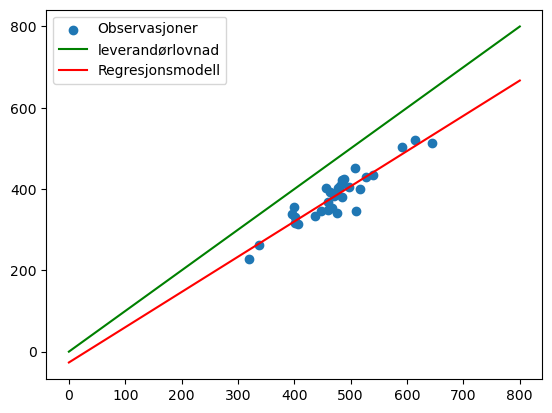

In [126]:
import numpy as np
X = df['WLTP-km'].values
Y = df['STOPP (km)'].values
a, b = np.polyfit(X, Y, 1)

x = np.linspace (0, 800, 100)
fig,ax=plt.subplots()

ax.scatter(X,Y, label='Observasjoner')
ax.plot(x,x,label='leverandørlovnad', color = 'green')

plt.plot(x, a*x + b, color='red', label='Regresjonsmodell')
plt.legend()
plt.show()
